# UVP projektna naloga

## PODNASLOV



### Naprej je potrebno pridobiti podatke s spletne strani. To storimo tako, da poženemo program *main.py* in sledimo navodilom v njemu. 
Ko smo to opravili se lahko lotimo nase analize podatkov.
Naprej nalozimo podatke iz .csv datoteke, ki jo je ustvaril main.py. Poglejmo, kako izgleda in katere podatke sploh imamo na voljo:

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

podatki_o_avtih = pd.read_csv("data.csv")
podatki_o_avtih.head()

,Id,Price (EUR),Transmission,Body Type,Number of seats,Drive wheel,Fuel Type,Number of Cylinders,Volume of engine,Power,Max Torque,Top Speed,Acceleration to 100km/h,Combined consumption l/100km
0,1,23200,5 speed manual transmission,"3-doors, hatchback",4,front,gasoline,4,1368,[],206,205.0,7.9,6.5
1,2,25500,5 speed manual transmission,"3-doors, convertible",4,front,gasoline,4,1368,[],206,205.0,7.9,6.5
2,4,21990,6 speed manual transmission,"3-doors, hatchback",4,front,gasoline,4,1368,[],201,208.0,8.2,6.9
3,5,24545,6 speed manual transmission,"3-doors, hatchback",4,front,gasoline,4,1368,[],250,213.0,7.9,6.0
4,7,30000,5 speed manual transmission,"5-doors, station wagon",5,front,gasoline,4,1970,[],206,220.0,8.2,8.9


Seveda nas najprej zanima, koliko podatkov sploh imamo na voljo. Število unikatnih avtomobilov, za katere imamo podatke je enostavno dobiti. Dolžina naše .csv datoteke je:

In [121]:
print(len(podatki_o_avtih.index))

48


Skupaj imamo torej:

In [122]:
print(len(podatki_o_avtih) * len(podatki_o_avtih.index))
print(list(podatki_o_avtih.columns))

2304
['Id', 'Price (EUR)', 'Transmission', 'Body Type', 'Number of seats', 'Drive wheel', 'Fuel Type', 'Number of Cylinders', 'Volume of engine', 'Power', 'Max Torque', 'Top Speed', 'Acceleration to 100km/h', 'Combined consumption l/100km']


Naša .csv datoteka torej očitno vsebuje kar precej podatkov. Poglejmo si nekaj hipotez za te podatke.
Za veliko večino ljudi je cena en izmed odločilnih kriterijev, ko se odločajo za nakup novega avtomobila, zato je smiselno vedeti, ali je avto nad- ali podpovprečno drag. 
Poglejmo si povprečje cene vseh avtomobilo, nato pa še razporeditev cen v grafu:



In [123]:
print(f"Povprecna cena avtomobila je tako {round(podatki_o_avtih["Price (EUR)"].mean(), 2)}, EUR")


Povprecna cena avtomobila je tako 55298.77, EUR


Poglejmo si se graf cene vseh avtomobilov in cena v odvisnosti od najvisje hitrosti:

<Axes: xlabel='Top Speed', ylabel='Price (EUR)'>

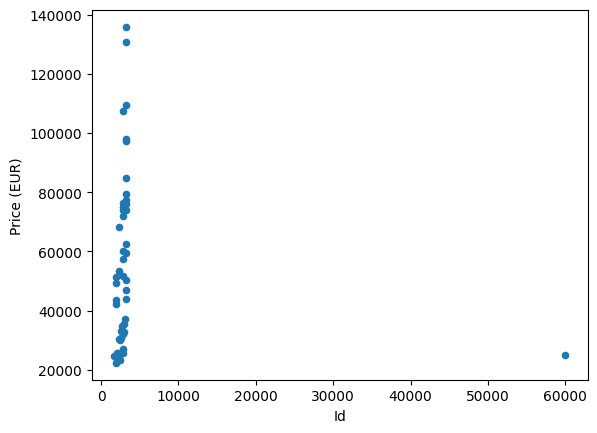

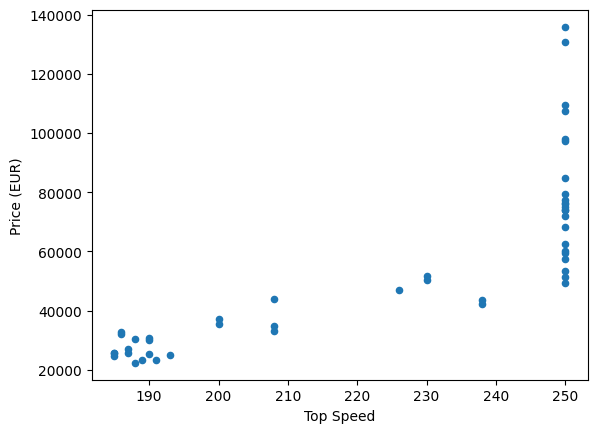

In [124]:
podatki_o_avtih.plot.scatter(x="Id", y="Price (EUR)")
podatki_o_avtih.plot.scatter(x="Top Speed", y="Price (EUR)")

Vidimo, da so v splosnem hitrejsi avtomobili drazji, kar nas seveda ne preseneca. 

Seveda so zanimivi tudi ostali podatki, kot so povprecno stevilo cilindrov v motorju, navor, najvisja hitrost, pospesek in kombinirane porabe. Tudi te lahko enostavno dobimo:

In [126]:
print(f"Povprecno stevilo cilindrov: {round(podatki_o_avtih["Number of Cylinders"].mean(), 2)}")
print(f"Povprecen navor: {round(podatki_o_avtih["Max Torque"].mean(), 2)} Nm")
print(f"Povprecna najvisja hitrost: {round(podatki_o_avtih["Top Speed"].mean(), 2)} km/h")
#print(f"Povprecen pospesek: {podatki_o_avtih["Acceleration to 100km/h"].mean()} s")
print(f"Povprecna kombinirana poraba: {round(podatki_o_avtih["Combined consumption l/100km"].mean(), 2)} l/100km")

Povprecno stevilo cilindrov: 5.23
Povprecen navor: 297.9 Nm
Povprecna najvisja hitrost: 224.08 km/h
Povprecna kombinirana poraba: 9.33 l/100km


Predstavimo lahko tudi pogostost vrste menjalnika, goriva in oblike:

<Axes: ylabel='Transmission'>

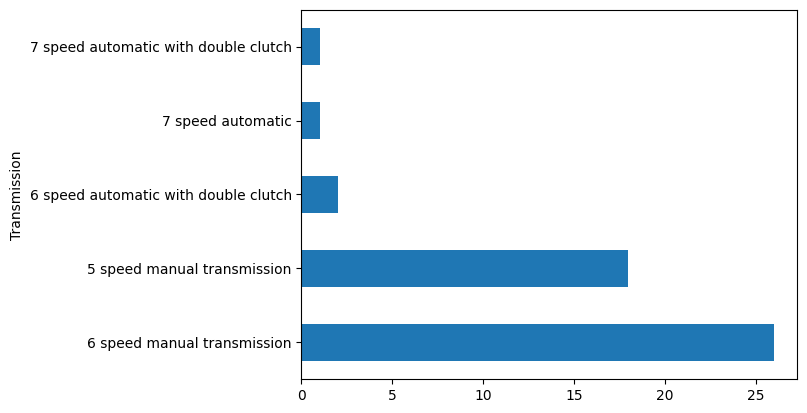

In [136]:
transmission = podatki_o_avtih["Transmission"].value_counts()
transmission.plot.barh()

<Axes: ylabel='Fuel Type'>

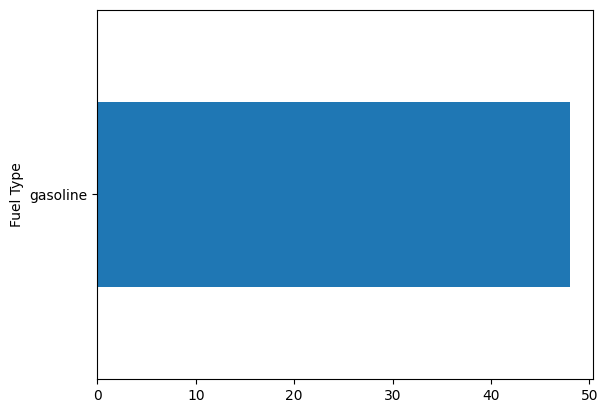

In [137]:
fuel = podatki_o_avtih["Fuel Type"].value_counts()
fuel.plot.barh()

<Axes: ylabel='Body Type'>

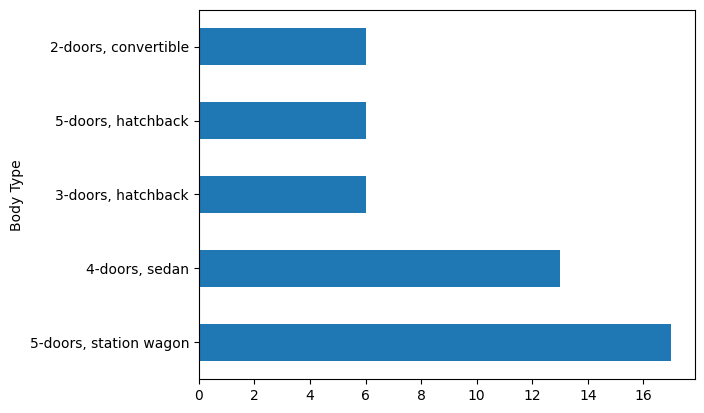

In [138]:

body = podatki_o_avtih["Body Type"].value_counts()
body.plot.barh()

<Axes: ylabel='Drive wheel'>

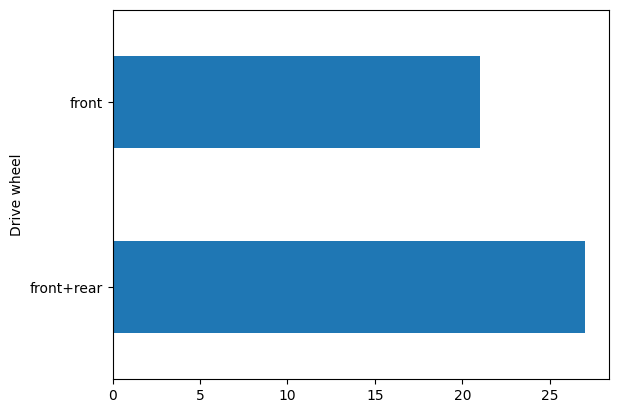

In [139]:
drive = podatki_o_avtih["Drive wheel"].value_counts()
drive.plot.barh()

<Axes: ylabel='Number of Cylinders'>

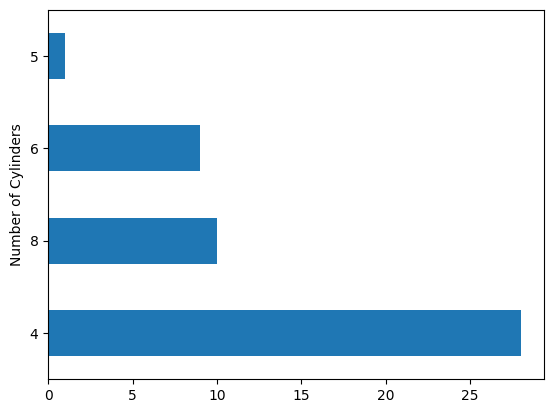

In [141]:
cyl = podatki_o_avtih["Number of Cylinders"].value_counts()
cyl.plot.barh()

<Axes: ylabel='Volume of engine'>

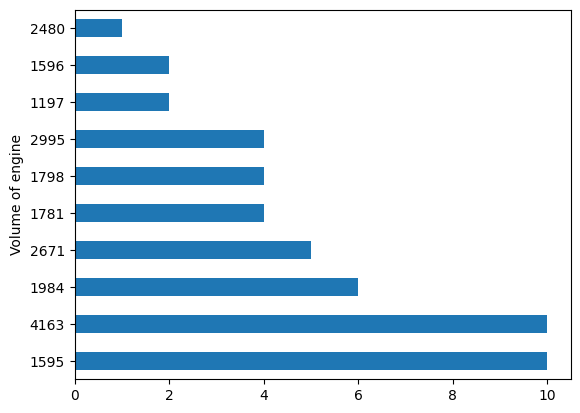

In [142]:
vol = podatki_o_avtih["Volume of engine"].value_counts()
vol.plot.barh()

## Druge zanimivosti
Lahko si pogledamo tudi, ali obstaja kaksna povezava med prostornino motorja in ceno. Podobno kot pri hitrosti pricakujemo, da bodo vecje prostornine pomenile drazji avto. Podobno se prepricamo se o vplivu prostornine motorja na porabo. Jasno je tudi, da imajo dizelski motorji vec navora kot bencinski, kar nam prav tako pokaze graf.

<Axes: xlabel='Fuel Type', ylabel='Max Torque'>

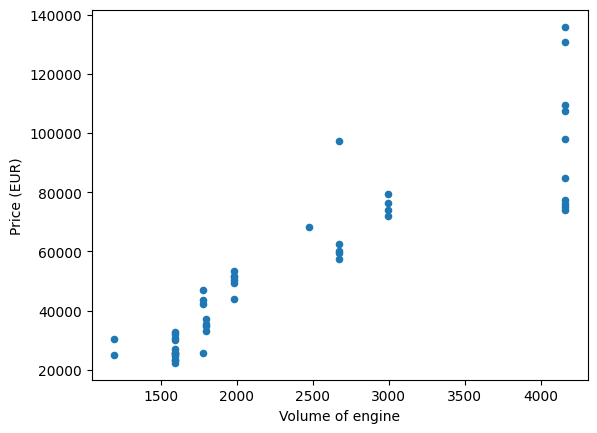

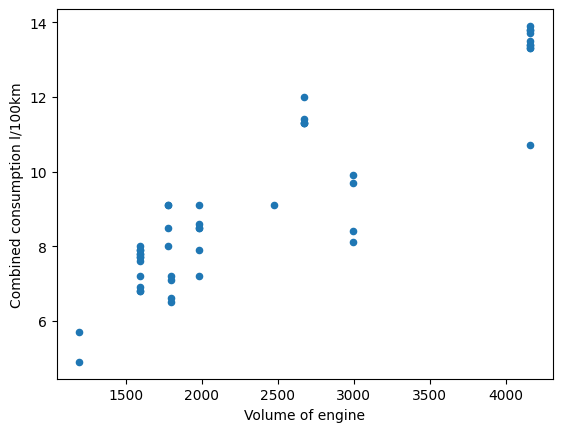

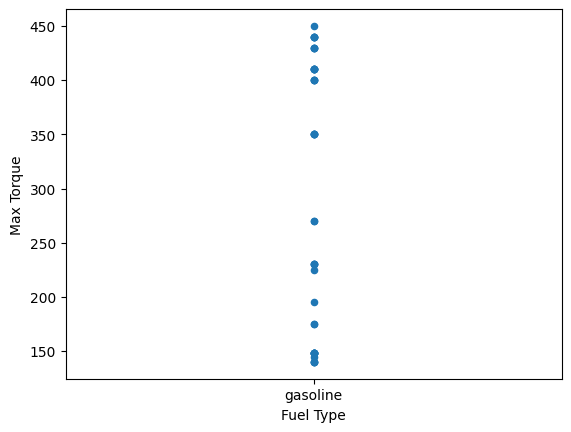

In [161]:
podatki_o_avtih.plot.scatter(x="Volume of engine", y="Price (EUR)")
podatki_o_avtih.plot.scatter(x="Volume of engine", y="Combined consumption l/100km")
podatki_o_avtih.plot.scatter(x="Fuel Type", y="Max Torque")


## Najbolj pogost avto
Z danimi podatki lahko sestavimo tudi "Najbolj pogost avto", tako da za njegove lastnosti vzamemo najbolj pogosto v vsaki kategoriji, pri stevilcnih kategorijah pa jemljemo povprecja.

In [181]:
sez = []
for element in list(podatki_o_avtih.columns):
    try:
        var = podatki_o_avtih[element].value_counts()[:1].index[0]
    except:
        var = podatki_o_avtih[element].median()
    print(f"{element}: {var}")

Id: 1
Price (EUR): 23200
Transmission: 5 speed manual transmission
Body Type: 4-doors, sedan
Number of seats: 5
Drive wheel: front
Fuel Type: gasoline
Number of Cylinders: 4
Volume of engine: 1598
Power: []
Max Torque: 140
Top Speed: 195.5
Acceleration to 100km/h: 10.6
Combined consumption l/100km: 8.149999999999999


/var/folders/49/bcc6_dcd0cvczkjnbz0p2qsw0000gn/T/ipykernel_57545/1344182278.py:4: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  var = podatki_o_avtih[element].value_counts()[:1].index[0]
/var/folders/49/bcc6_dcd0cvczkjnbz0p2qsw0000gn/T/ipykernel_57545/1344182278.py:4: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  var = podatki_o_avtih[element].value_counts()[:1].index[0]
/var/folders/49/bcc6_dcd0cvczkjnbz0p2qsw0000gn/T/ipykernel_57545/1344182278.py:4: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  